In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

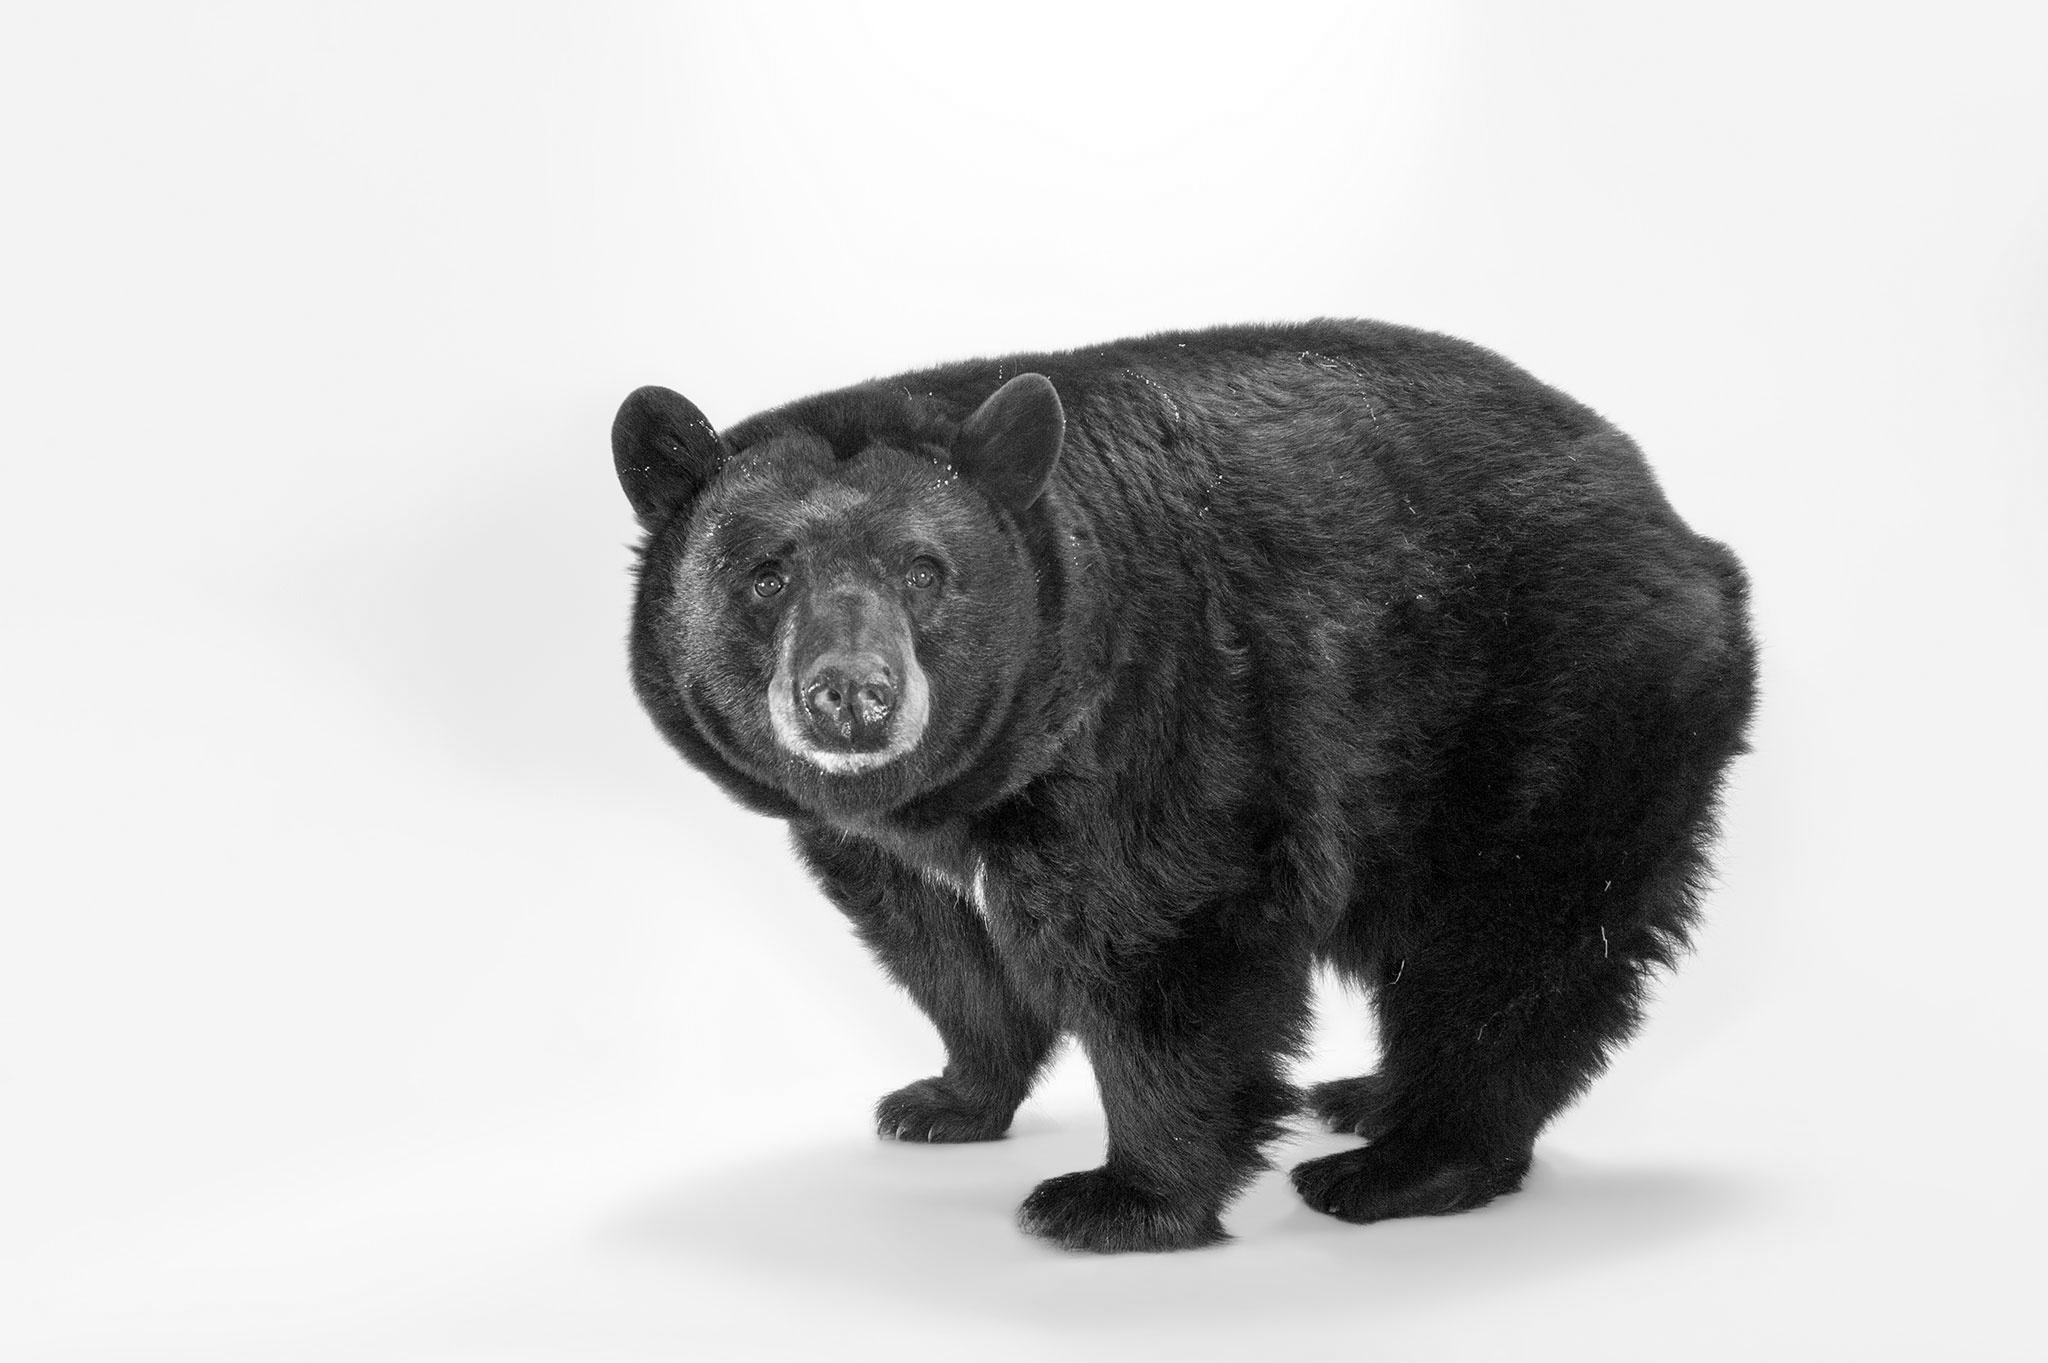

In [18]:
img = Image.open('bear.jpg').convert('L')
img.convert('L')

In [19]:
class ConvolutionImage:
    def __init__(self, image):
        self.gray_scaled = np.array(image)
    def convolve(self, kernel):
        m, n = self.gray_scaled.shape
        self.convolved_image = np.zeros_like(self.gray_scaled)
        k_m, k_n = kernel.shape
        kernel_sum = kernel.sum()
        accum = 0
        for y in range(0, m-1):
            for x in range(0, n-1 ):
                accum = 0
                '''
                Depending on the sum's location will change pixel values aka offset of -1 for the kernel.
                In this case, I sum right away for each pixel making zero the starting point
                '''
                for y_k in range(0, k_n-1):
                    for x_k in range(0, k_m-1):
                        pixel_val = 0
                        row = y + y_k
                        col = x + x_k
                        if row >= 0 and row < m-1 and col>=0 and col < n - 1:
                            pixel_val = self.gray_scaled[row][col]
                        kernel_val = kernel[y_k][x_k]
                        accum += kernel_val*pixel_val
                self.convolved_image[y,x] = accum

In [20]:
kernel = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

In [21]:
def show_image(img):
    for x in range(10):
        ci = ConvolutionImage(img)
        ci.convolve(kernel)
        img = ci.convolved_image
        yield plt.imshow(img, cmap="gray")

In [22]:
convolutions = show_image(img)

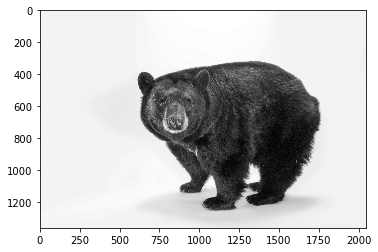

In [23]:
next(convolutions)

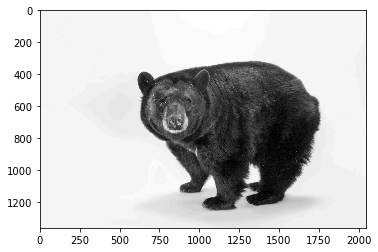

In [24]:
next(convolutions)

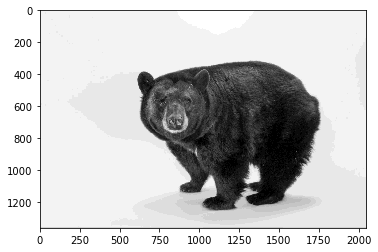

In [25]:
next(convolutions)

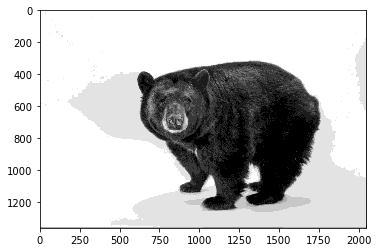

In [26]:
next(convolutions)

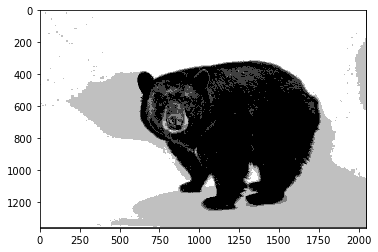

In [27]:
next(convolutions)

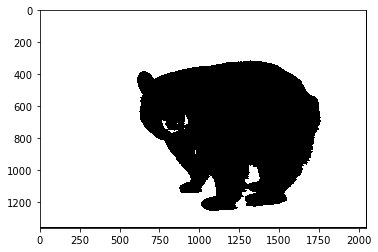

In [28]:
next(convolutions)